In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
dataset = pd.read_csv("1895-2022.csv")
dataset.columns = ['Date', 'Temperature', 'Anomaly']
dataset.Date = dataset.Date.floordiv(100)
dataset.head(7)

,Date,Temperature,Anomaly
0,1895,61.50,-1.98
1,1896,63.69,0.21
2,1897,62.23,-1.25
3,1898,63.39,-0.09
4,1899,61.16,-2.32
5,1900,63.91,0.43
6,1901,63.14,-0.34


In [29]:
X_train, X_test, y_train, y_test = train_test_split(dataset.Date.values.reshape(-1,1), 
                                                    dataset.Temperature.values, random_state=11)
X_train.shape

(93, 1)

In [30]:
X_test.shape

(31, 1)

In [31]:
linear_regression = LinearRegression()

In [32]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [33]:
linear_regression.coef_

array([0.01996285])

In [34]:
linear_regression.intercept_

24.342796540123388

In [40]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p,e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 63.63, expected: 62.86
predicted: 64.49, expected: 63.68
predicted: 62.75, expected: 61.78
predicted: 63.01, expected: 62.01
predicted: 63.83, expected: 61.38
predicted: 63.41, expected: 62.79
predicted: 62.69, expected: 65.45


In [43]:
predict = (lambda x : linear_regression.coef_ * x + linear_regression.intercept_)
print(predict(2019))

[64.64778769]


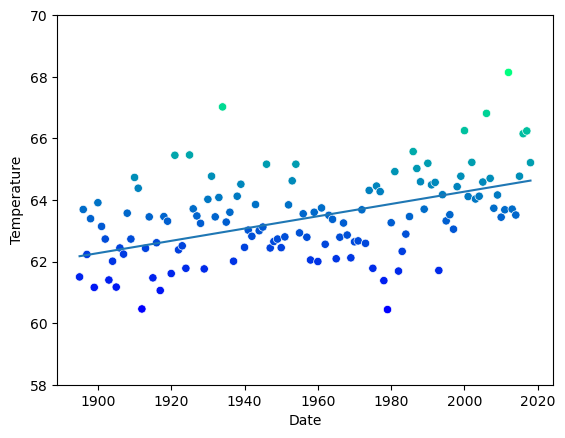

In [59]:
axes = sns.scatterplot(data=dataset, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(58, 70)
x = np.array([min(dataset.Date.values), max(dataset.Date.values)])
y = predict(x)
line = plt.plot(x,y)

axes.set_xlabel('Date')
axes.set_ylabel('Temperature')

plt.show()